In [24]:
from fastai.imports import *
import matplotlib.dates as mdates

```py
df = pd.DataFrame(
    {'Date':['3/7/2024'],
     'Time':['8:53 PM'],
     'AA-Battery': [3.197],
     'Lipo-Battery':[None]
    })
df
```

```py
new_row = {'Date':'6/7/2024',
     'Time':'11:48 AM',
     'AA-Battery': None,
     'Lipo-Battery':12.61
    }

df = df._append(new_row, ignore_index=True)
df
```

```py
df = df.drop(2)
df
```

In [8]:
df = pd.read_csv('./battery_data/battery_data.csv', index_col=0)

In [9]:
df

,Date,Time,AA-Battery,Lipo-Battery
0,3/7/2024,8:53 PM,3.197,NaN
1,6/7/2024,11:48 AM,NaN,12.61
2,9/7/2024,3:14 PM,3.117,12.59
3,15/7/2024,4:53 PM,3.072,12.54
4,22/7/2024,3:05 PM,3.037,12.49
5,1/8/2024,11:32 AM,3.008,12.43
6,9/8/2024,1:15 AM,2.989,12.38


In [10]:
df['Date'] + ' ' + df['Time']

0     3/7/2024 8:53 PM
1    6/7/2024 11:48 AM
2     9/7/2024 3:14 PM
3    15/7/2024 4:53 PM
4    22/7/2024 3:05 PM
dtype: object

In [12]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %I:%M %p')

In [4]:
def append_data(df, date, time, aa, lipo):
    new_row = {'Date':date,
     'Time':time,
     'AA-Battery':aa,
     'Lipo-Battery':lipo
    }
    
    filtered = {k: v for k, v in new_row.items() if v is not None}

    return df._append(filtered, ignore_index=True)
    

In [13]:
df

,Date,Time,AA-Battery,Lipo-Battery,datetime
0,3/7/2024,8:53 PM,3.197,NaN,2024-07-03 20:53:00
1,6/7/2024,11:48 AM,NaN,12.61,2024-07-06 11:48:00
2,9/7/2024,3:14 PM,3.117,12.59,2024-07-09 15:14:00
3,15/7/2024,4:53 PM,3.072,12.54,2024-07-15 16:53:00
4,22/7/2024,3:05 PM,3.037,12.49,2024-07-22 15:05:00
5,1/8/2024,11:32 AM,3.008,12.43,2024-08-01 11:32:00
6,9/8/2024,1:15 AM,2.989,12.38,2024-08-09 01:15:00


In [57]:
df.dtypes

Date             object
Time             object
AA-Battery      float64
Lipo-Battery    float64
dtype: object

In [86]:
df.dtypes

Date                    object
Time                    object
AA-Battery             float64
Lipo-Battery           float64
datetime        datetime64[ns]
dtype: object

In [62]:
df.Date.describe()

count                      4
mean     2024-07-08 06:00:00
min      2024-07-03 00:00:00
25%      2024-07-05 06:00:00
50%      2024-07-07 12:00:00
75%      2024-07-10 12:00:00
max      2024-07-15 00:00:00
Name: Date, dtype: object

In [10]:
def to_hours(days):
    return days * 24

def in_months(days):
    return days / 30

In [14]:
diff_batt_time = df.datetime.max() - df.datetime.min()
diff_batt_time_hours = to_hours(diff_batt_time.days)

In [15]:
diff_batt = df['AA-Battery'].max() - df['AA-Battery'].min()

battery_drain_per_day = diff_batt / diff_batt_time.days

In [98]:
battery_drain_per_day

0.011363636363636364

In [16]:
battery_drain_per_day

0.008888888888888898

In [13]:
battery_drain_per_day

0.006750000000000002

In [16]:
battery_drain_per_day

0.005777777777777783

In [17]:
max_battery_AA = 3.19
min_mcu_vdd = 2.0

days_before_kong = (max_battery_AA - min_mcu_vdd) / battery_drain_per_day

days_before_kong

205.96153846153828

In [105]:
in_months(days_before_kong)

3.490666666666667

In [18]:
in_months(days_before_kong)

4.462499999999995

In [15]:
in_months(days_before_kong)

5.876543209876542

In [18]:
in_months(days_before_kong)

6.86538461538461

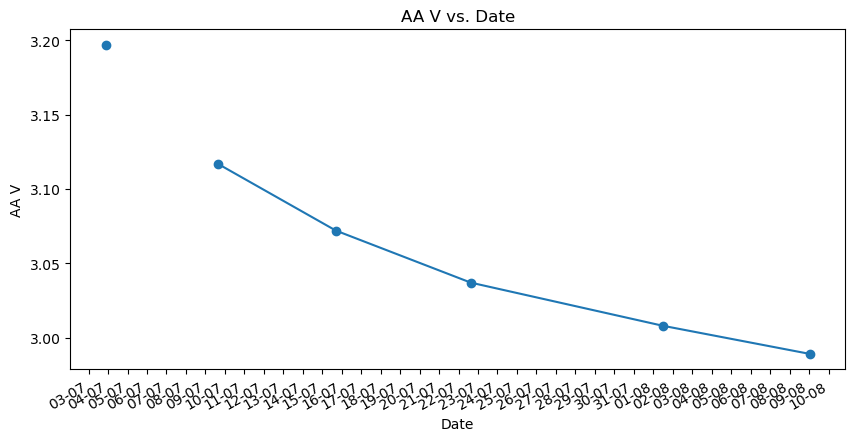

In [28]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['AA-Battery'], marker='o')

# Formatting the date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('AA V')
plt.title('AA V vs. Date')

# Show plot
plt.show()

In [19]:
diff_lipo_time = df['datetime'].max() - df['datetime'][1]

diff_lipo_batt = df['Lipo-Battery'].max() - df['Lipo-Battery'].min()

lipo_drain_per_day = diff_lipo_batt / diff_lipo_time.days

In [110]:
lipo_drain_per_day

0.00777777777777781

In [20]:
lipo_drain_per_day

0.007499999999999951

In [17]:
lipo_drain_per_day

0.0071999999999999885

In [20]:
lipo_drain_per_day

0.006969696969696929

In [21]:
max_battery_Lipo = 12.6
min_lipo = 9.0

days_before_lipo_kong = (max_battery_Lipo - min_lipo) / lipo_drain_per_day

days_before_lipo_kong

516.5217391304378

In [114]:
in_months(days_before_lipo_kong)

15.428571428571363

In [22]:
in_months(days_before_lipo_kong)

16.000000000000103

In [19]:
in_months(days_before_lipo_kong)

16.666666666666693

In [22]:
in_months(days_before_lipo_kong)

17.217391304347927

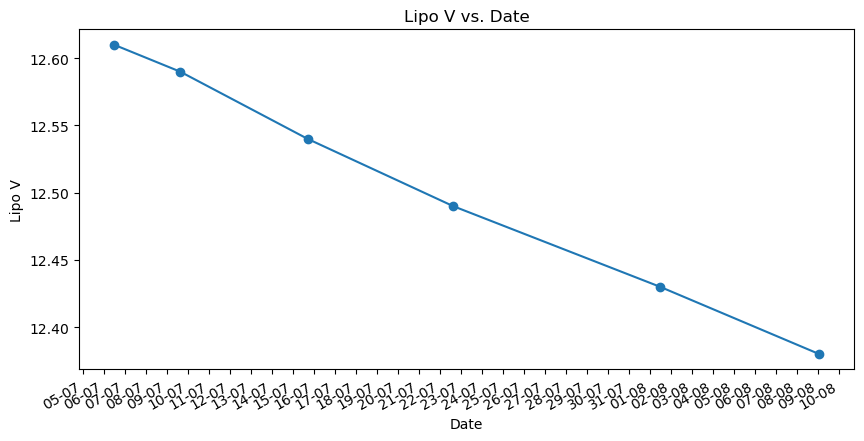

In [27]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['Lipo-Battery'], marker='o')

# Formatting the date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Lipo V')
plt.title('Lipo V vs. Date')

# Show plot
plt.show()